spreadsheet -> https://docs.google.com/spreadsheets/d/1lG5TFf4q5jGEF9K-_wrGlwEjfGOWxFBQQRhSt_gE_9c/edit#gid=0

In [2]:
import duckdb
import polars
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
con = duckdb.connect('md:')

In [21]:
database = "mlb_uat"

In [26]:
fct_batting_season_totals = con.sql(f"""
    select  
        tot.*,
        games.games as team_g_total

    from {database}.main.fct_batting_season_totals tot
    inner join {database}.main.dim_2023_players players
    on tot.mlbid = players.mlbid
    
    inner join {database}.main.team_games games
    on games.tm_id = players.team
    
    where players.active = 'Y'
""").df()

In [16]:
dim_players_2023 = con.sql("select mlbid, team, active from mlb_uat.main.dim_2023_players where active = 'Y'").df()

In [22]:
dim_players_2023

,mlbID,TEAM,ACTIVE
0,592741,DET,Y
1,425794,STL,Y
2,571656,CIN,Y
3,625643,CHW,Y
4,672335,BAL,Y
...,...,...,...
1038,457759,BOS,Y
1039,664059,SEA,Y
1040,666214,DET,Y
1041,521230,CHW,Y


In [18]:
team_games = con.sql("select * from mlb_uat.main.team_games").df()

In [19]:
team_games

,Tm,tm_id,games
0,Baltimore Orioles,BAL,114
1,Tampa Bay Rays,TB,116
2,Toronto Blue Jays,TOR,116
3,Boston Red Sox,BOX,114
4,New York Yankees,NYY,115
5,Minnesota Twins,MIN,116
6,Cleveland Guardians,CLE,115
7,Detroit Tigers,DET,114
8,Chicago White Sox,CHW,116
9,Kansas City Royals,KC,116


In [27]:
fct_batting_season_totals.sort_values('sb_total', ascending=False)

,mlbid,team,g_total,g_total_rank,pa_total,pa_total_rank,ab_total,ab_total_rank,r_total,r_total_rank,...,cs_total_rank,ba_total,ba_total_rank,obp_total,obp_total_rank,slg_total,slg_total_rank,ops_total,ops_total_rank,team_g_total
2,660670,Atlanta,112.0,22,516.0,3,449.0,8,101.0,1,...,2,36.197,3,45.865,2,62.349,5,108.217,3,112
145,665923,Oakland,90.0,155,386.0,116,350.0,108,34.0,203,...,4,24.398,106,27.996,153,30.699,203,58.695,174,115
7,682998,Arizona,110.0,44,451.0,60,395.0,67,79.0,10,...,45,30.647,17,37.533,26,58.030,7,95.563,9,115
35,677951,Kansas City,113.0,13,493.0,16,458.0,5,59.0,51,...,2,28.850,33,33.817,73,49.768,33,83.584,43,116
28,677551,Tampa Bay,109.0,52,477.0,34,429.0,23,62.0,40,...,1,29.934,23,36.183,41,49.828,32,86.012,33,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,669087,Texas,16.0,493,40.0,495,38.0,493,3.0,504,...,280,3.016,478,3.683,493,4.466,487,8.150,482,115
381,506702,Texas,21.0,466,44.0,490,41.0,489,4.0,489,...,280,3.283,471,3.550,500,4.533,484,8.083,484,115
383,605137,Miami,8.0,555,35.0,509,31.0,513,5.0,469,...,280,2.300,506,2.983,511,4.900,479,7.883,486,115
127,605137,Cleveland,97.0,118,393.0,102,347.0,109,26.0,269,...,165,21.430,152,29.252,138,34.493,168,63.749,152,115


In [5]:
fct_batting_season_totals[fct_batting_season_totals['sb_total'] > 20][['sb_total', 'team']].sort_values('sb_total')

,sb_total,team
96,21.0,Philadelphia
57,21.0,Toronto
6,22.0,Houston
138,22.0,Tampa Bay
68,23.0,Boston
15,23.0,Milwaukee
226,23.0,Arizona
194,24.0,New York
32,24.0,San Diego
108,25.0,Washington


In [31]:
fct_batting_season_totals[fct_batting_season_totals['mlbid'] == '660670']

,mlbid,team,g_total,g_total_rank,pa_total,pa_total_rank,ab_total,ab_total_rank,r_total,r_total_rank,...,cs_total_rank,ba_total,ba_total_rank,obp_total,obp_total_rank,slg_total,slg_total_rank,ops_total,ops_total_rank,team_g_total
2,660670,Atlanta,112.0,22,516.0,3,449.0,8,101.0,1,...,2,36.197,3,45.865,2,62.349,5,108.217,3,112


In [32]:
player_row = 2

In [33]:
fct_batting_season_totals.iloc[player_row]

mlbid              660670
team              Atlanta
g_total             112.0
g_total_rank           22
pa_total            516.0
pa_total_rank           3
ab_total            449.0
ab_total_rank           8
r_total             101.0
r_total_rank            1
h_total             153.0
h_total_rank            3
2b_total             29.0
2b_total_rank          10
3b_total              2.0
3b_total_rank          60
hr_total             26.0
hr_total_rank          10
rbi_total            69.0
rbi_total_rank         24
bb_total             58.0
bb_total_rank          15
ibb_total             2.0
ibb_total_rank         31
so_total             65.0
so_total_rank         202
hbp_total             7.0
hbp_total_rank         41
sh_total              0.0
sh_total_rank         166
gdp_total            11.0
gdp_total_rank         37
sb_total             52.0
sb_total_rank           1
cs_total              9.0
cs_total_rank           2
ba_total           36.197
ba_total_rank           3
obp_total   

In [34]:
total_games = 162
total_games_played = fct_batting_season_totals.iloc[player_row]['team_g_total']
stat = 'hr'
stat_count_goal = 40
stat_count = fct_batting_season_totals.iloc[player_row][f'{stat}_total']
stat_count_needed = stat_count_goal - stat_count
pa = fct_batting_season_totals.iloc[player_row]['pa_total']
avg_pa = pa / total_games_played
expected_pa = avg_pa * (total_games - total_games_played)
stat_per_ab = stat_count / pa
iterations = 100

In [35]:
def run_monte_carlo_sim_event(stat_per_ab, expected_pa, stat_count):
    stat = stat_count.copy()
    stat_tracker = []
    for n in range(int(expected_pa)):
        rand = np.random.random()
        if rand <= stat_per_ab:
            stat += 1
        stat_tracker.append(stat)

    return stat, stat_tracker
        

In [36]:
def iterate(iterations, expected_pa, stat_per_ab, stat_count):
    stat_list = []
    stat_tracker_list = []
    for n in range(iterations):
        stat, stat_tracker = run_monte_carlo_sim_event(stat_per_ab, expected_pa, stat_count)
        stat_list.append(stat)
        stat_tracker_list.append(stat_tracker)
    
    return stat_list, stat_tracker_list


0.3


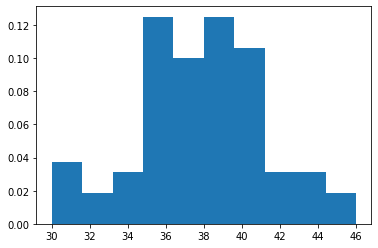

In [37]:
stat_list, stat_tracker_list = iterate(iterations, expected_pa, stat_per_ab, stat_count)
plt.hist(stat_list, bins = 10, density=True)
stat_array = np.array(stat_list)
filter_arr = stat_array >= stat_count_goal

print(sum(filter_arr)/iterations)

In [109]:
stat_tracker_list

[[26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  26.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  27.0,
  28.0,
  28.0,
  28.0,
  28.0,
  28.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  29.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  30.0,
  31.0,
  31.0,
  31.0,
  31.0,
  31.0,


In [110]:
sim_df = pd.DataFrame()

In [97]:
i = 0
for stat_tracker in stat_tracker_list:
    i += 1
    sim_df[f'sim{i}'] = stat_tracker

In [111]:
sim_df

""


In [99]:
con.sql("create or replace table mlb.main.acuna_hr_sim_results as select *, row_number() over() as row_number from sim_df")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [60]:
sim_df['sim1'] = stat_tracker_list[0]

In [90]:
[f'sim{i}' for i in range(1, 101)]

['sim1',
 'sim2',
 'sim3',
 'sim4',
 'sim5',
 'sim6',
 'sim7',
 'sim8',
 'sim9',
 'sim10',
 'sim11',
 'sim12',
 'sim13',
 'sim14',
 'sim15',
 'sim16',
 'sim17',
 'sim18',
 'sim19',
 'sim20',
 'sim21',
 'sim22',
 'sim23',
 'sim24',
 'sim25',
 'sim26',
 'sim27',
 'sim28',
 'sim29',
 'sim30',
 'sim31',
 'sim32',
 'sim33',
 'sim34',
 'sim35',
 'sim36',
 'sim37',
 'sim38',
 'sim39',
 'sim40',
 'sim41',
 'sim42',
 'sim43',
 'sim44',
 'sim45',
 'sim46',
 'sim47',
 'sim48',
 'sim49',
 'sim50',
 'sim51',
 'sim52',
 'sim53',
 'sim54',
 'sim55',
 'sim56',
 'sim57',
 'sim58',
 'sim59',
 'sim60',
 'sim61',
 'sim62',
 'sim63',
 'sim64',
 'sim65',
 'sim66',
 'sim67',
 'sim68',
 'sim69',
 'sim70',
 'sim71',
 'sim72',
 'sim73',
 'sim74',
 'sim75',
 'sim76',
 'sim77',
 'sim78',
 'sim79',
 'sim80',
 'sim81',
 'sim82',
 'sim83',
 'sim84',
 'sim85',
 'sim86',
 'sim87',
 'sim88',
 'sim89',
 'sim90',
 'sim91',
 'sim92',
 'sim93',
 'sim94',
 'sim95',
 'sim96',
 'sim97',
 'sim98',
 'sim99',
 'sim100']

In [61]:
sim_df

,sim1
0,25.0
1,26.0
2,26.0
3,26.0
4,26.0
...,...
243,40.0
244,40.0
245,40.0
246,40.0


In [56]:
stat_tracker_list[0]

[25.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 27.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,
 33.0,

In [112]:
hr_sim_results_final = pd.DataFrame(stat_array, columns=['Sim Results'])

In [113]:
con.sql('create or replace table mlb.main.acuna_hr_sim_results_final as select * from hr_sim_results_final')



In [8]:
df = fct_batting_season_totals.copy()

In [27]:
def simulate_season(df):
    # loop over 4040 stats
    for stat in ['hr', 'sb']:
        stat_prob_array = []
        # loop over dataset
        for i in range(len(fct_batting_season_totals)):
            # set/calc vars
            total_games = 162
            total_games_played = fct_batting_season_totals.iloc[i]['g_total']
            stat_count_goal = 40
            stat_count = fct_batting_season_totals.iloc[i][f'{stat}_total']
            stat_count_needed = stat_count_goal - stat_count
            pa = fct_batting_season_totals.iloc[i]['pa_total']
            avg_pa = pa / total_games_played
            # NEED TO RECALCULATE THIS FIELD. TOTAL GAMES PLAYED IS BASED ON IND. GAMES, NOT TEAM GAMES
            expected_pa = avg_pa * (total_games - total_games_played)
            stat_per_ab = stat_count / pa
            iterations = 1000
            
            # iterate over monte carlo sim
            stat_list = iterate(iterations, expected_pa, stat_per_ab)
            # convert list to array
            stat_array = np.array(stat_list)
            # filter array based on stat count needed
            filter_arr = stat_array >= stat_count_needed
            # append stat probability to list
            stat_prob_array.append(sum(filter_arr)/iterations)
        
        # add col for stat count
        df[f'40{stat}prob'] = stat_prob_array
    
    # calculate prob of reaching 40 hr and 40 sb
    df['4040prob'] = df[f'40hrprob'] * df[f'40sbprob']
             
    return df, stat_array

In [28]:
df, stat_array = simulate_season(df)

/Users/zachshirah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/zachshirah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [29]:
stat_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
df

,mlbid,team,g_total,g_total_rank,pa_total,pa_total_rank,ab_total,ab_total_rank,r_total,r_total_rank,...,ba_total_rank,obp_total,obp_total_rank,slg_total,slg_total_rank,ops_total,ops_total_rank,40hrprob,40sbprob,4040prob
0,660271,Los Angeles,110.0,7,493.0,7,411.0,30,85.0,5,...,4,43.825,5,75.392,1,119.218,1,1.000,0.0,0.000
1,518692,Los Angeles,109.0,16,500.0,2,436.0,7,95.0,2,...,2,44.867,2,62.201,4,107.067,2,0.029,0.0,0.000
2,660670,Atlanta,108.0,23,496.0,5,431.0,10,98.0,1,...,3,44.265,3,59.599,5,103.867,3,0.291,1.0,0.291
3,605141,Los Angeles,104.0,62,482.0,13,406.0,39,89.0,4,...,10,39.932,9,62.632,3,102.565,4,0.922,0.0,0.000
4,621566,Atlanta,108.0,23,482.0,13,409.0,34,83.0,6,...,47,38.633,12,62.920,2,101.553,5,1.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,571946,Los Angeles,1.0,624,1.0,626,1.0,625,0.0,591,...,604,0.000,613,0.000,604,0.000,613,0.000,0.0,0.000
635,660636,Arizona,1.0,624,1.0,626,1.0,625,0.0,591,...,604,0.000,613,0.000,604,0.000,613,0.000,0.0,0.000
636,669256,Detroit,1.0,624,0.0,633,0.0,633,0.0,591,...,604,0.000,613,0.000,604,0.000,613,0.000,0.0,0.000
637,664314,New York,1.0,624,0.0,633,0.0,633,0.0,591,...,604,0.000,613,0.000,604,0.000,613,0.000,0.0,0.000


In [24]:
df[df['mlbid'] == '660670']

,mlbid,team,g_total,g_total_rank,pa_total,pa_total_rank,ab_total,ab_total_rank,r_total,r_total_rank,...,ba_total_rank,obp_total,obp_total_rank,slg_total,slg_total_rank,ops_total,ops_total_rank,40hrprob,40sbprob,4040prob
2,660670,Atlanta,108.0,23,496.0,5,431.0,10,98.0,1,...,3,44.265,3,59.599,5,103.867,3,0.291,1.0,0.291


In [25]:
df.sort_values(['4040prob', '40hrprob', '40sbprob'], ascending=False).head(15)

,mlbid,team,g_total,g_total_rank,pa_total,pa_total_rank,ab_total,ab_total_rank,r_total,r_total_rank,...,ba_total_rank,obp_total,obp_total_rank,slg_total,slg_total_rank,ops_total,ops_total_rank,40hrprob,40sbprob,4040prob
421,680869,Oakland,18.0,478,76.0,431,69.0,431,12.0,374,...,453,5.383,455,9.133,412,14.517,422,0.808,0.803,0.648824
2,660670,Atlanta,108.0,23,496.0,5,431.0,10,98.0,1,...,3,44.265,3,59.599,5,103.867,3,0.291,1.000,0.291000
294,665862,Miami,50.0,331,200.0,296,182.0,293,23.0,282,...,296,15.634,307,22.500,282,38.133,295,0.070,0.945,0.066150
307,514888,Houston,41.0,372,182.0,314,156.0,318,33.0,203,...,318,14.902,319,19.911,305,34.813,308,0.055,0.228,0.012540
7,682998,Arizona,107.0,39,437.0,62,383.0,70,77.0,9,...,16,36.533,26,57.163,7,93.696,8,0.010,1.000,0.010000
292,682829,Cincinnati,51.0,329,226.0,275,209.0,269,41.0,156,...,298,15.433,311,22.916,279,38.350,293,0.010,0.995,0.009950
80,641355,Chicago,80.0,196,340.0,146,304.0,142,62.0,31,...,72,29.316,118,43.365,68,72.684,81,0.054,0.039,0.002106
40,677951,Kansas City,110.0,7,479.0,15,447.0,5,59.0,44,...,32,32.484,78,48.568,31,81.051,41,0.002,0.986,0.001972
77,665487,San Diego,91.0,136,419.0,76,382.0,71,62.0,31,...,93,29.033,126,43.810,64,72.843,78,0.076,0.006,0.000456
443,687799,Seattle,13.0,506,38.0,494,32.0,499,6.0,455,...,459,5.166,463,6.667,437,11.833,444,0.004,0.001,0.000004


In [26]:
con.sql('create or replace table mlb.main.fct_batting_season_totals_v2 as select * from df')